## Stats 131 Final Project  - Lukas Ronkin, Sarah Kaunitz, David Lee

### Video Presentation Link: https://youtu.be/QP5eSQ274kE

# *Capital Bike Sharing Data*
###### https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## Context and Description of the data
### Background Information:
#### This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. Capital Bikeshare is metro DC's bikeshare service, with 4,300 bikes and 500+ stations across 6 jurisdictions. Capital bikeshare is designed for quick trips with convenience in mind, it’s a fun and affordable way to get around. Bikeshare systems are designed for shared use of bicycles on a short term basis for a fee or sometimes free. Bikesharing systems are extremely popular in urban areas where storing a bike at one’s home or apartment might not be possible. A bikeshare system allows city commuters to conveniantley pick up a bike at a docking station wherever their point A is, and drop it off near their point B. Typically bikesharing systems are paired with an mobile app that allows users to see where the nearest pickup and drop off spot is. Interestingly enough, UCLA just introduced a bikesharing system of their own in October 2017, allowing students to bike around campus and Westwood. UCLA hopes “to create a seamless regional bike-share system by early 2018” with West Hollywood, Santa Monica, and Beverly Hills.


### Information about data collection

#### The 2011 - 2012 Capital bikeshare data was collected by Hadi Fanaee-T who is affiliated with the Laboratory of Artificial Intelligence and Decision Support (LIAAD) at the University of Porto in Portugal. The original source of the bikeshare data came directly from Capital bikeshare’s website, while weather information and holiday schedules were collected from http://www.freemeteo.com and http://dchr.dc.gov/page/holiday-schedule, respectively. This data would be classified as a convenience sample because it is just Washington DC data, and therefore can not be generalized to the entire United States.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
day = pd.read_csv('day.csv')

## Exploratory Analysis
### Guiding Question: Our goal is to conduct appropriate exploratory data analysis in order to try and find good predictors of how many users will be using the bikeshare system on a given day.

In [3]:
print(day.shape)
day.info()

(731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### The dataset has 731 rows (each corresponding to a specific day over 2 years) and 16 columns. Each column relays information pertaining to that specific day.

#### Unusual Features / Variable Explanation:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### The season variable does not necesarilly follow traditional seasons, so we created a new variable called 'tradSeason' which follows the rules of:
- Spring: Months 3 : 5
- Summer: Months 6 : 8
- Fall: Months 9 : 11
- Winter: 12 : 2


In [4]:

def alert(c):
    if c['mnth'] in [3,4,5]:
        return 'Spring'
    elif c['mnth'] in [6,7,8]:
        return 'Summer'
    elif c['mnth'] in [9,10,11]:
        return 'Fall'
    else:
        return 'Winter'
day['tradSeason'] = day.apply(alert, axis=1)

In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Breakdown of users by season:

In [6]:
x = day.groupby('tradSeason')['casual','registered'].sum()
x

,casual,registered
tradSeason,,
Fall,166686,756488
Spring,180531,649169
Summer,224102,818382
Winter,48698,448623


Text(0.5,1,'Casual vs Registered Users by Season')

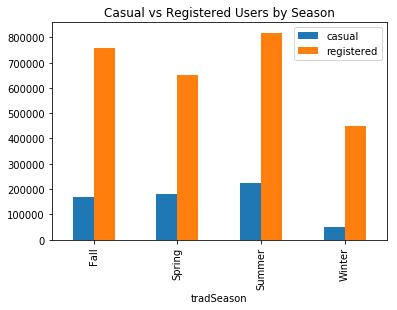

In [7]:
x.plot.bar()
plt.title("Casual vs Registered Users by Season")

#### The graph above shows that there are far more registered users than casual users across all seasons. For both casual and registered users, the busiest season is Summer followed by Fall. 

In [8]:
day.groupby('holiday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,710.0,4527.104225,1929.013947,22.0,3214.0,4558.0,5932.75,8714.0
1,21.0,3735.000000,2103.350660,1000.0,1951.0,3351.0,6034.00,7403.0


#### The difference in holiday / non holiday summary statistics is due to there were only 21 holiday observation, and 710 non holidays. Might not have a significant holiday sample size to compare.

#### Statistics by month:

In [9]:
day.groupby('mnth')['cnt'].mean()

mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64

#### Above we can see the average count of bikeshare users by month, as you might expect, summer months are much more busy than winter months. Interestingly enough, the dramatic drop is seen from December to January. Which might be easier seen in the plot below:

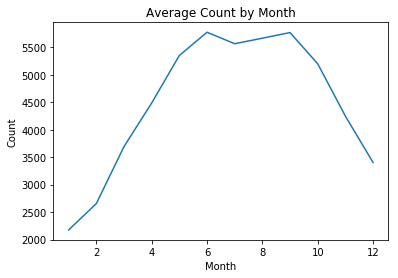

In [10]:
plt.plot(day.groupby('mnth')['cnt'].mean())
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Average Count by Month")
plt.show()

In [11]:
x = day.groupby('mnth')['atemp', 'cnt'].mean()
x

,atemp,cnt
mnth,,
1,0.239796,2176.338710
2,0.299731,2655.298246
3,0.381954,3692.258065
4,0.457081,4484.900000
5,0.565662,5349.774194
6,0.638246,5772.366667
7,0.704094,5563.677419
8,0.651475,5664.419355
9,0.579299,5766.516667


#### The table above shows the "feels like" temperature and count by month. As you can see, number of users increases as temperature increases.

#### Count statistics by season:

In [12]:
day.groupby('tradSeason')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
tradSeason,,,,,,,,
Fall,182.0,5072.384615,1824.916947,22.0,3897.25,4889.5,6613.25,8714.0
Spring,184.0,4509.239130,1802.070633,605.0,3137.25,4572.0,6099.25,8362.0
Summer,184.0,5665.673913,1337.403092,1115.0,4622.25,5324.0,6929.25,8173.0
Winter,181.0,2747.629834,1393.789627,431.0,1543.00,2493.0,3750.00,6606.0


Text(0.5,1,'Biker Count by Season')

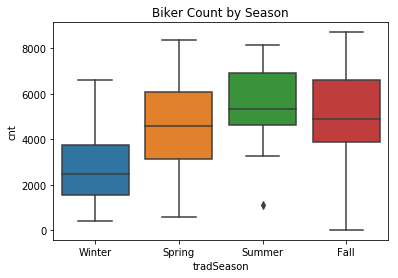

In [13]:
sns.boxplot(x = 'tradSeason', y = 'cnt', data = day)
plt.title("Biker Count by Season")


#### Summer is the busiest season by no surprise, and it might have to do with the average temperature of the season. Lets explore:

In [14]:
day.groupby('tradSeason')['atemp'].mean()

tradSeason
Fall      0.472867
Spring    0.468353
Summer    0.664891
Winter    0.288254
Name: atemp, dtype: float64

#### As you can see, Summer is the warmest season, and therefore it is no surprise that it is the busiest season. 

Text(0.5,1,'Relationship between Temp and Biker Count')

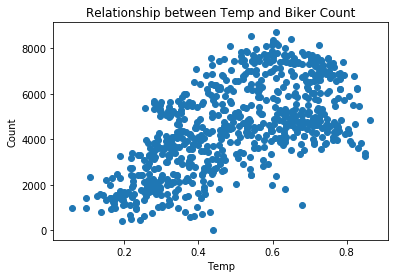

In [15]:
plt.scatter(day.temp, day.cnt)
plt.xlabel("Temp")
plt.ylabel("Count")
plt.title("Relationship between Temp and Biker Count")

#### From the plot above, we can see that temperature has a positive relationship with the number of users.

#### Breakdown of users according to weather types:

Text(0.5,1,'Biker Count by Type of Weather')

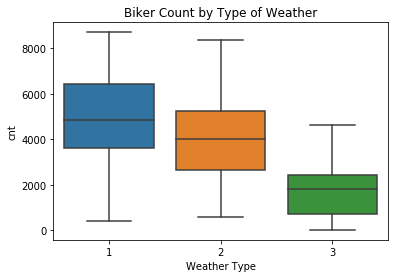

In [16]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.xlabel("Weather Type")
plt.title("Biker Count by Type of Weather")

#### For plot interpretation, 1 = Clear, 2 = Cloudy, 3 = Cold/Light Snow. The plots above show that there are the most users when the weather is clear and users decrease as weather gets worse. This parallels the notion that temperature predicts number of users.

Text(0.5,1,'Scatterplot between Temperature and Humidity')

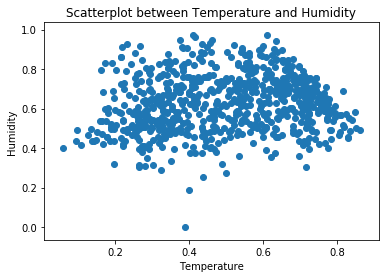

In [17]:
plt.scatter(day.temp, day.hum)
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Scatterplot between Temperature and Humidity")

#### The above scatterplot shows the relationship between temperature and humidiy. We can see that there is very little correlation between the two variables which is likely due to the standardization.

## Data Modeling

#### Based on our findings from exploratory analysis we decided the "feels like" temperature (atemp) was the best predictor for number of users on a given day (cnt)

Text(0.5,1,'Regression Line: atemp predicting Count')

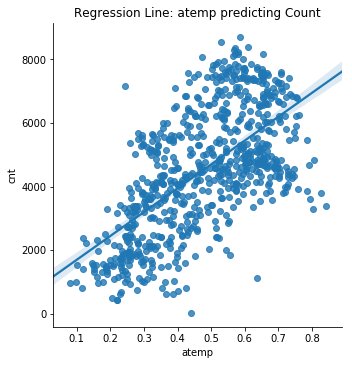

In [18]:
sns.lmplot(x = 'atemp', y = 'cnt',data = day)
plt.title("Regression Line: atemp predicting Count")

In [19]:
np.corrcoef(day.atemp, day.cnt)

array([[1.       , 0.6310657],
       [0.6310657, 1.       ]])

#### The regression plot and correlation between temperature and count show that there is strong positive linear correlation. The next step is to create a regression model to see how well atemp predicts count

### Running Regression Models:

In [20]:
X = day['atemp']
target = pd.DataFrame(day.cnt, columns = ["cnt"])
y = target["cnt"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     482.5
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           1.85e-82
Time:                        21:15:57   Log-Likelihood:                -6384.0
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     729   BIC:                         1.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        945.8240    171.291      5.522      0.000     609.541    1282.107
atemp       7501.8339    341.538     21.965      0.000    6831.318    8172.350
==============================================================================
Omnibus:                       13.710   Durbin-Watson:                   0.475
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.448
Skew:                           0.150   Prob(JB):                      0.00888
Kurtosis:                       2.531   Cond. No.                         7.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The model above is the output for a simple linear regression model with atemp as a predictor and cnt as the outcome variable. 

#### With atemp alone in the model, it has an intercept of 945.8240 and a slope coefficient of 7501.8339. We can interpret this by saying for every 1 unit increase of atemp, count increases by 7501.8339. This is somewhat hard to interpret in context because atemp ranges from 0 to 1, but for example if the atemp for a given day is 0.5 then we would expect around 945.8240 +  7501.8339(0.5), which is about  4697 users, that day. 

#### The p value associated with atemp is approximately 0, and therefore is a statistically significant predictor of count. The output shows that this simple linear regression model has an r squared value of .398. This can be interpreted as 39.8% of the variation in the count variable can be explained by the atemp variable. This implies our model does a decent job predicting count.

### Adding Variables

Text(0.5,1,'Regression Line: hum predicting Count')

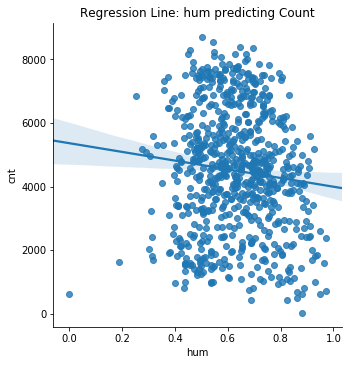

In [21]:
sns.lmplot(x = 'hum', y = 'cnt',data = day)
plt.title("Regression Line: hum predicting Count")

In [22]:
X = day[['hum', 'atemp']]
target = pd.DataFrame(day.cnt, columns = ["cnt"])
y = target["cnt"]
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     279.9
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           6.85e-91
Time:                        21:15:58   Log-Likelihood:                -6361.2
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     728   BIC:                         1.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2439.9990    274.198      8.899      0.000    1901.686    2978.312
hum        -2622.0191    382.788     -6.850      0.000   -3373.518   -1870.520
atemp       7822.6392    334.559     23.382      0.000    7165.824    8479.454
==============================================================================
Omnibus:                        6.777   Durbin-Watson:                   0.405
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                5.569
Skew:                           0.128   Prob(JB):                       0.0617
Kurtosis:                       2.657   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X = day[['atemp','hum', 'windspeed']]
target = pd.DataFrame(day.cnt, columns = ["cnt"])
y = target["cnt"]
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     209.1
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           8.99e-98
Time:                        21:15:58   Log-Likelihood:                -6342.3
No. Observations:                 731   AIC:                         1.269e+04
Df Residuals:                     727   BIC:                         1.271e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3773.9591    342.867     11.007      0.000    3100.831    4447.088
atemp       7504.0919    330.236     22.723      0.000    6855.762    8152.422
hum        -3167.4848    383.443     -8.261      0.000   -3920.272   -2414.698
windspeed  -4411.6646    709.841     -6.215      0.000   -5805.248   -3018.081
==============================================================================
Omnibus:                        5.360   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.694
Skew:                           0.127   Prob(JB):                       0.0956
Kurtosis:                       2.700   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Regression Line: windspeed predicting Count')

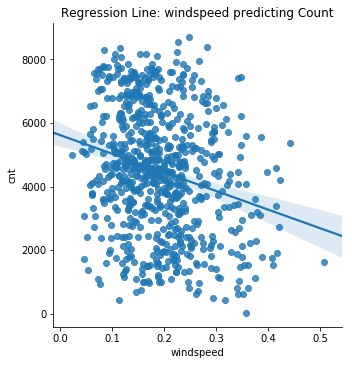

In [24]:
sns.lmplot(x = 'windspeed', y = 'cnt',data = day)
plt.title("Regression Line: windspeed predicting Count")

#### From the outputs above we can see that adding more variables into the model does increase r squared and the coefficients are still statistically significant (p value less than 0.05). Our final model with atemp, humidity, and windspeed proved to be the best predictive model for count. 

#### In this model, humidity and windspeed have negative slopes therefore as those two variables increase, count will decrease. This relationship is also shown in the regression line plots. Intuitively, this makes sense because those are undesirable conditions for riding a bike.

#### The equation for the model is: Expected Count = 3773.9591 + 7504.0919(atemp) - 3167.4848(humidity) - 4411.6646(windspeed).  Our r squared value is 0.463 which can be interpreted as 46.3% of the variation in count can be explained by atemp, humidity and windspeed.